- [x] eys open  [0.5,'>='] for both left and right
- [x] blur [0.5,'>=']
- [x] white background  [0.58,'>=']
- [x] liveness  fiop mean [0.2,'>='], agg[0.2,'>='], print spoof [0.5,'>=']
- [x] multiplefaces  [0.8,'>=']
- [x] occu mean [0.7,'>='] both

In [1]:
pwd

'/home/user/Documents/saiteja/analysis/liveness/self_kyc'

In [2]:
ls

 df_jio_self_kyc_liveness_5_11_apr.csv
 df_skyc_eye_model_mxnet_april12_18.csv
 fns_fps_csv/
 jio_self_kycapr5_12.csv7195296948773312302.csv
'jio_self_kyc liveness_analysis-Copy1.ipynb'
'jio_self_kyc liveness_analysis-Copy2.ipynb'
'jio_self_kyc liveness_analysis-Copy4.ipynb'
'jio_self_kyc liveness_analysis.ipynb'
'jio_self_kyc liveness_analysis-propercolumn.ipynb'
 jio_self_kyc_liveness_april12_18.csv
 jio_self_kyc_liveness_april12_18_xcall.csv
 jio_self_kyc_liveness_april12_18_xcall.csv7539574527553165759.csv
 jio_self_kyc_liveness_april19_may2.csv
 jio_self_kyc_liveness_april19_may2.csv5749990292382041424.csv
'jio_self_kyc_liveness - df_jio_self_kyc_liveness_5_11_apr.csv'
 jio_self_kyc_liveness_may11_may17.csv
 jio_self_kyc_liveness_may3_may10.csv
 jio_self_kyc_liveness_may3_may10.csv8746816714141113532.csv
 jio_skyc_5_12_final.csv
 new.csv
 selfkyc_fns_fps_april_5_11.zip
 skyc_white_background_fns_april5_12.csv
 skyc_white_background_fns_april5_12_new.csv
 skyc_white_background_fps_

In [5]:
import pandas as pd
import psycopg2
import numpy as np
import psycopg2.extras as extras
db_params = {
"host" : "34.93.80.142",
"port" : 5432,
"dbname" :  "turing-db",
"user" : "postgres@jiovishwam-staging-db-1",
"password" : "yDiMcatxFHj26wyFmr",
"sslmode" : "require"
}
connection = psycopg2.connect(**db_params)

- checking count

In [6]:
query = "select count(xcall_id) from transactions where app_id='jio_self_kyc' and path='/v1/check_liveness'  and created_at>'2023-05-10 18:30:00' and created_at<'2023-05-17 18:30:00';"

In [7]:
pd.read_sql(sql=query, con = connection)

/home/user/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


count
0    114

In [9]:
import pandas as pd

In [10]:
df_jio_self_kyc_liveness = pd.read_csv('jio_self_kyc_liveness_may11_may17.csv')
df_jio_self_kyc_liveness

xcall_id  response_code                    orn  \
0    1082ae71c7d56f5b79c8578aa4db3cc5            422           NO00000BBIO0   
1    bc71cd80f2ede0262bf0e19de94985d8            200           NO00000BBIO0   
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
3    1f1e5b41b3599e9ea11a09ed23b52626            200                  zipak   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
..                                ...            ...                    ...   
109  574e0799bd1f2c8e20b80f256714f79a            422  Testorn_1684329489688   
110  80b46ffc5a5b630195c3d0db84951099            200         _1684329483171   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   
112  79a6cdd5a4c231b5fae3b1df60f5885b            200         _1684329724231   
113  f68f512bb76672431f6c3392693884b5            200         _1684329724231   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
0               0       NaN      0          NaN     NaN        False   
1               0  accepted      1          NaN     yes        False   
2               0  accepted      1          NaN     yes         True   
3               0  accepted      1          NaN     yes         True   
4               0  accepted      1          NaN     yes         True   
..            ...       ...    ...          ...     ...          ...   
109             0       NaN      0          NaN     NaN         True   
110             0  accepted      1          NaN     yes        False   
111             0  accepted      1          NaN     yes         True   
112             0  accepted      1          NaN     yes        False   
113             0  accepted      1          NaN     yes        False   

     printfake  ...   fiop_ps  journey  bl_threshold  is_blacklist  \
0        False  ...  1.000000      NaN           NaN           NaN   
1        False  ...  1.000000      NaN           NaN           NaN   
2        False  ...  0.999891      NaN           NaN           NaN   
3        False  ...  0.999821      NaN           NaN           NaN   
4        False  ...  1.000000      NaN           NaN           NaN   
..         ...  ...       ...      ...           ...           ...   
109      False  ...  0.999997      NaN           NaN           NaN   
110      False  ...  0.979923      NaN           NaN           NaN   
111      False  ...  0.995309      NaN           NaN           NaN   
112      False  ...  0.631052      NaN           NaN           NaN   
113      False  ...  0.953358      NaN           NaN           NaN   

     is_agent_agg  fiopmean_agent  fiopmean_agent_agg  is_cust_models  \
0             NaN             NaN                 NaN             NaN   
1             NaN             NaN                 NaN             NaN   
2             NaN             NaN                 NaN             NaN   
3             NaN             NaN                 NaN             NaN   
4             NaN             NaN                 NaN             NaN   
..            ...             ...                 ...             ...   
109           NaN             NaN                 NaN             NaN   
110           NaN             NaN                 NaN             NaN   
111           NaN             NaN                 NaN             NaN   
112           NaN             NaN                 NaN             NaN   
113           NaN             NaN                 NaN             NaN   

     check_blacklist_cust               created_at  
0                     NaN  2023-05-12 09:12:08.752  
1                     NaN  2023-05-12 09:12:08.942  
2                     NaN  2023-05-12 09:12:10.493  
3                     NaN  2023-05-12 09:16:17.977  
4                     NaN  2023-05-12 09:31:58.227  
..                    ...                      ...  
109                   NaN  2023-05-17 13:18:16.074  
110                   NaN  2023-05-17 13:18:16.176  
111                 

In [11]:
#pbm_s data
df1 = pd.read_csv('jio_self_kyc_liveness_may11_may17.csv8803869867662776405.csv')

In [12]:
df1

xcall_id                user_id     pbm_s
0                            xcall_id                    500  0.000000
1    2d404519b2cb979cedaeb141357abd3c           NO00000BBIO8  0.709422
2    bc71cd80f2ede0262bf0e19de94985d8           NO00000BBIO0  0.677541
3    b6e60f34b21d3bc6985637a2209b62fe           NO00000BBIO3  0.999998
4    1f1e5b41b3599e9ea11a09ed23b52626                  zipak  0.969180
..                                ...                    ...       ...
110  79a6cdd5a4c231b5fae3b1df60f5885b         _1684329724231  0.999953
111  aac7f080a499b1fb6963bae94b78b9f1                  refId  0.000000
112  80b46ffc5a5b630195c3d0db84951099         _1684329483171  0.999905
113  f68f512bb76672431f6c3392693884b5         _1684329724231  0.999963
114  7cdfca61899d186bf92cfc61c9f5f182  Testorn_1684329489688  0.745596

[115 rows x 3 columns]

In [13]:
c = 0
for i,j in zip(sorted(df_jio_self_kyc_liveness.xcall_id),sorted(df1.xcall_id)):
    if i == j:
        c = c+1

In [14]:
c

114

In [15]:
df_jio_self_kyc_liveness = df_jio_self_kyc_liveness.merge(df1,on='xcall_id')

In [16]:
#df_jio_self_kyc_liveness = df_jio_self_kyc_liveness.copy()

In [17]:
df_jio_self_kyc_liveness

xcall_id  response_code                    orn  \
0    1082ae71c7d56f5b79c8578aa4db3cc5            422           NO00000BBIO0   
1    bc71cd80f2ede0262bf0e19de94985d8            200           NO00000BBIO0   
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
3    1f1e5b41b3599e9ea11a09ed23b52626            200                  zipak   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
..                                ...            ...                    ...   
109  574e0799bd1f2c8e20b80f256714f79a            422  Testorn_1684329489688   
110  80b46ffc5a5b630195c3d0db84951099            200         _1684329483171   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   
112  79a6cdd5a4c231b5fae3b1df60f5885b            200         _1684329724231   
113  f68f512bb76672431f6c3392693884b5            200         _1684329724231   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
0               0       NaN      0          NaN     NaN        False   
1               0  accepted      1          NaN     yes        False   
2               0  accepted      1          NaN     yes         True   
3               0  accepted      1          NaN     yes         True   
4               0  accepted      1          NaN     yes         True   
..            ...       ...    ...          ...     ...          ...   
109             0       NaN      0          NaN     NaN         True   
110             0  accepted      1          NaN     yes        False   
111             0  accepted      1          NaN     yes         True   
112             0  accepted      1          NaN     yes        False   
113             0  accepted      1          NaN     yes        False   

     printfake  ...  bl_threshold  is_blacklist  is_agent_agg  fiopmean_agent  \
0        False  ...           NaN           NaN           NaN             NaN   
1        False  ...           NaN           NaN           NaN             NaN   
2        False  ...           NaN           NaN           NaN             NaN   
3        False  ...           NaN           NaN           NaN             NaN   
4        False  ...           NaN           NaN           NaN             NaN   
..         ...  ...           ...           ...           ...             ...   
109      False  ...           NaN           NaN           NaN             NaN   
110      False  ...           NaN           NaN           NaN             NaN   
111      False  ...           NaN           NaN           NaN             NaN   
112      False  ...           NaN           NaN           NaN             NaN   
113      False  ...           NaN           NaN           NaN             NaN   

     fiopmean_agent_agg  is_cust_models  check_blacklist_cust  \
0                   NaN             NaN                   NaN   
1                   NaN             NaN                   NaN   
2                   NaN             NaN                   NaN   
3                   NaN             NaN                   NaN   
4                   NaN             NaN                   NaN   
..                  ...             ...                   ...   
109                 NaN             NaN                   NaN   
110                 NaN             NaN                   NaN   
111                 NaN             NaN                   NaN   
112                 NaN             NaN                   NaN   
113                 NaN             NaN                   NaN   

                  created_at                user_id     pbm_s  
0    2023-05-12 09:12:08.752           NO00000BBIO0  0.503782  
1    2023-05-12 09:12:08.942           NO00000BBIO0  0.677541  
2    2023-05-12 09:12:10.493           NO00000BBIO3  0.999998  
3    2023-05-12 09:16:17.977                  zipak  0.969180  
4    2023-05-12 09:31:58.227           NO00000BBIO8  0.709422  
..                       ...                    ...       ...  
109  2023-05-

# liveness check

In [18]:
df_jio_self_kyc_liveness.shape

(114, 57)

In [19]:
df_jio_self_kyc_liveness.is_live.value_counts()

yes    47
Name: is_live, dtype: int64

In [22]:
df_jio_self_kyc_liveness[df_jio_self_kyc_liveness['is_live']=='yes']

xcall_id  response_code                    orn  \
1    bc71cd80f2ede0262bf0e19de94985d8            200           NO00000BBIO0   
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
3    1f1e5b41b3599e9ea11a09ed23b52626            200                  zipak   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
10   1529cab118bd74d594dc95088cf554ec            200           NO00000BBIOE   
11   1e300625e50db30d9c42740276c6a4b1            200           NO00000BBIOL   
14   af02490f9c4096a9d04dc1992453bbc9            200           NO00000BBIP9   
15   2208510815e4ec3e881eed078b21b0a1            200           NO00000BBIPF   
16   539d600344970f5e5a8911285391e836            200           NO00000BBIPI   
17   0a497818e747153e70432c0aca88c658            200           NO00000BBIPL   
18   79c73ae237992494ff9d6f06fba1ffdd            200           NO00000BBIPV   
31   5ebfc2c5ffce2c5b5ff4247ea4536d02            200           NO00000BBITD   
32   499c19d0836e20892b425f5f0da8ac2e            200           NO00000BBIOL   
34   e55c07427e47b1e76a12bb7a5d099d68            200           NO00000BBIU7   
35   49b58df2f9e4c1a07d8d6d2c1aae00c3            200           NO00000BBIUI   
36   062abb925e72e90b55af7221dd7fc4e0            200           NO00000BBIUO   
37   9e1b3d328704dde5c4232b6f0cb56194            200           NO00000BBIXX   
38   7f753d6f889340b94d77a6a180f2e0a3            200           NO00000BBJ0D   
40   5a8261584077bf401fcf8a50d7a2e95c            200           NO00000BBJ0Z   
41   3fcb3879660be89e70e84c4aefed34bb            200           NO00000BBJ1K   
42   621f75b9b2127132e9fadc3b7f4cbd59            200           NO00000BBJ1M   
43   03504c2684720d60ef299ced59946b10            200           NO00006CE1PI   
56   dd14aa179b70735e8beee027c01ad187            200                  refId   
65   a0febe0b0b97717e6798b8807decc4bc            200                  refId   
66   74acbb955fda5543a4b0c1cd268ee1fe            200           NO00000BBLZQ   
69   7cdb0ac04a1f6f6a3a671e4ec611564b            200                testorn   
73   4e691f357ae42d58457dd374e3804b0b            200                  refId   
74   99a0008fcbaab23f5d7ba5b8d2fb3509            200                testorn   
75   c23c09912991b6e6bb7009516beb2547            200                testorn   
76   99dce9c397d0420e7656db89ec039299            200                testorn   
77   ed29db2edb83d69bc4efe30f9070a48f            200                testorn   
79   efc8029dab6bb65ddcfe5b3128c25d14            200                testorn   
82   434d2b7c9edb6c6e75c44a2c99f25c2f            200                  refId   
83   eddb2361459a0839cca6578581c73e1a            200    ashis_1684328352440   
84   486df2c778e8aec2e56c7f1fccdabf9e            200                testorn   
85   a518876e0a6f7c6161502171927c75f9            200                  refId   
86   191264607033e8c4b1a5044f6a885dd7            200  testorn_1684328552119   
87   29482e0ac3045ffde74bce7bab9958fe            200                testorn   
88   b27d07b02f027fc5215897ee694f1609            200                testorn   
98   1df4a4fd53357a8b1850b75286f05931            200                  refId   
106  5eaad51ccd9af240824f878e9f90ca49            200  testorn_1684329154557   
107  24ee95cb0f5ce3e92b635135830434ad            200  testorn_1684329154557   
108  aac7f080a499b1fb6963bae94b78b9f1            200                  refId   
110  80b46ffc5a5b630195c3d0db84951099            200         _1684329483171   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   
112  79a6cdd5a4c231b5fae3b1df60f5885b            200         _1684329724231   
113  f68f512bb76672431f6c3392693884b5            200         _1684329724231   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
1               0  accepted      1          NaN     yes        False   
2               0  accepted      1          NaN     yes         True   
3               0  a

In [21]:
df_jio_self_kyc_liveness[((df_jio_self_kyc_liveness['fiopmean'].astype('float')>=0.2) & (df_jio_self_kyc_liveness['fiopmean_agg'].astype('float')>=0.2) & (df_jio_self_kyc_liveness['fiopmean_v2'].astype('float')>=0.50))]

xcall_id  response_code                    orn  \
0    1082ae71c7d56f5b79c8578aa4db3cc5            422           NO00000BBIO0   
1    bc71cd80f2ede0262bf0e19de94985d8            200           NO00000BBIO0   
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
5    9d0679029ab4a4ab282308655eba4be6            422           NO00000BBIOE   
..                                ...            ...                    ...   
109  574e0799bd1f2c8e20b80f256714f79a            422  Testorn_1684329489688   
110  80b46ffc5a5b630195c3d0db84951099            200         _1684329483171   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   
112  79a6cdd5a4c231b5fae3b1df60f5885b            200         _1684329724231   
113  f68f512bb76672431f6c3392693884b5            200         _1684329724231   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
0               0       NaN      0          NaN     NaN        False   
1               0  accepted      1          NaN     yes        False   
2               0  accepted      1          NaN     yes         True   
4               0  accepted      1          NaN     yes         True   
5               0       NaN      0          NaN     NaN         True   
..            ...       ...    ...          ...     ...          ...   
109             0       NaN      0          NaN     NaN         True   
110             0  accepted      1          NaN     yes        False   
111             0  accepted      1          NaN     yes         True   
112             0  accepted      1          NaN     yes        False   
113             0  accepted      1          NaN     yes        False   

     printfake  ...  bl_threshold  is_blacklist  is_agent_agg  fiopmean_agent  \
0        False  ...           NaN           NaN           NaN             NaN   
1        False  ...           NaN           NaN           NaN             NaN   
2        False  ...           NaN           NaN           NaN             NaN   
4        False  ...           NaN           NaN           NaN             NaN   
5        False  ...           NaN           NaN           NaN             NaN   
..         ...  ...           ...           ...           ...             ...   
109      False  ...           NaN           NaN           NaN             NaN   
110      False  ...           NaN           NaN           NaN             NaN   
111      False  ...           NaN           NaN           NaN             NaN   
112      False  ...           NaN           NaN           NaN             NaN   
113      False  ...           NaN           NaN           NaN             NaN   

     fiopmean_agent_agg  is_cust_models  check_blacklist_cust  \
0                   NaN             NaN                   NaN   
1                   NaN             NaN                   NaN   
2                   NaN             NaN                   NaN   
4                   NaN             NaN                   NaN   
5                   NaN             NaN                   NaN   
..                  ...             ...                   ...   
109                 NaN             NaN                   NaN   
110                 NaN             NaN                   NaN   
111                 NaN             NaN                   NaN   
112                 NaN             NaN                   NaN   
113                 NaN             NaN                   NaN   

                  created_at                user_id     pbm_s  
0    2023-05-12 09:12:08.752           NO00000BBIO0  0.503782  
1    2023-05-12 09:12:08.942           NO00000BBIO0  0.677541  
2    2023-05-12 09:12:10.493           NO00000BBIO3  0.999998  
4    2023-05-12 09:31:58.227           NO00000BBIO8  0.709422  
5    2023-05-12 09:59:46.650           NO00000BBIOE  0.527197  
..                       ...                    ...       ...  
109  2023-05-

In [28]:
df_jio_self_kyc_liveness.dc_rd.value_counts()

accepted    42
Name: dc_rd, dtype: int64

In [29]:
##### 

In [30]:
results = pd.DataFrame(columns=['model','tps','tns','fps','fns','real_acc','fake_acc','accuracy'])

In [31]:
results

Empty DataFrame
Columns: [model, tps, tns, fps, fns, real_acc, fake_acc, accuracy]
Index: []

In [32]:
df_jio_self_kyc_liveness.properphoto.value_counts()

True     91
False    23
Name: properphoto, dtype: int64

In [33]:
df_jio_self_kyc_liveness.capture_type.value_counts()

0    114
Name: capture_type, dtype: int64

# Customer

In [34]:
df_customer = df_jio_self_kyc_liveness[df_jio_self_kyc_liveness['capture_type'].astype(int)==0]

In [35]:
df_customer

xcall_id  response_code                    orn  \
0    1082ae71c7d56f5b79c8578aa4db3cc5            422           NO00000BBIO0   
1    bc71cd80f2ede0262bf0e19de94985d8            200           NO00000BBIO0   
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
3    1f1e5b41b3599e9ea11a09ed23b52626            200                  zipak   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
..                                ...            ...                    ...   
109  574e0799bd1f2c8e20b80f256714f79a            422  Testorn_1684329489688   
110  80b46ffc5a5b630195c3d0db84951099            200         _1684329483171   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   
112  79a6cdd5a4c231b5fae3b1df60f5885b            200         _1684329724231   
113  f68f512bb76672431f6c3392693884b5            200         _1684329724231   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
0               0       NaN      0          NaN     NaN        False   
1               0  accepted      1          NaN     yes        False   
2               0  accepted      1          NaN     yes         True   
3               0  accepted      1          NaN     yes         True   
4               0  accepted      1          NaN     yes         True   
..            ...       ...    ...          ...     ...          ...   
109             0       NaN      0          NaN     NaN         True   
110             0  accepted      1          NaN     yes        False   
111             0  accepted      1          NaN     yes         True   
112             0  accepted      1          NaN     yes        False   
113             0  accepted      1          NaN     yes        False   

     printfake  ...  bl_threshold  is_blacklist  is_agent_agg  fiopmean_agent  \
0        False  ...           NaN           NaN           NaN             NaN   
1        False  ...           NaN           NaN           NaN             NaN   
2        False  ...           NaN           NaN           NaN             NaN   
3        False  ...           NaN           NaN           NaN             NaN   
4        False  ...           NaN           NaN           NaN             NaN   
..         ...  ...           ...           ...           ...             ...   
109      False  ...           NaN           NaN           NaN             NaN   
110      False  ...           NaN           NaN           NaN             NaN   
111      False  ...           NaN           NaN           NaN             NaN   
112      False  ...           NaN           NaN           NaN             NaN   
113      False  ...           NaN           NaN           NaN             NaN   

     fiopmean_agent_agg  is_cust_models  check_blacklist_cust  \
0                   NaN             NaN                   NaN   
1                   NaN             NaN                   NaN   
2                   NaN             NaN                   NaN   
3                   NaN             NaN                   NaN   
4                   NaN             NaN                   NaN   
..                  ...             ...                   ...   
109                 NaN             NaN                   NaN   
110                 NaN             NaN                   NaN   
111                 NaN             NaN                   NaN   
112                 NaN             NaN                   NaN   
113                 NaN             NaN                   NaN   

                  created_at                user_id     pbm_s  
0    2023-05-12 09:12:08.752           NO00000BBIO0  0.503782  
1    2023-05-12 09:12:08.942           NO00000BBIO0  0.677541  
2    2023-05-12 09:12:10.493           NO00000BBIO3  0.999998  
3    2023-05-12 09:16:17.977                  zipak  0.969180  
4    2023-05-12 09:31:58.227           NO00000BBIO8  0.709422  
..                       ...                    ...       ...  
109  2023-05-

In [94]:
df_customer.properphoto.value_counts()

True     91
False    23
Name: properphoto, dtype: int64

# Customer Eye model

In [37]:
# #eyes 
# df_customer_eye_model = df_customer[(df_customer['eyescore_left'].astype('float')!=0) & (df_customer['eyescore_right'].astype('float')!=0)]
# cutomer_eye_model_tps = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')>=0.50) & (df_customer_eye_model['eyescore_right'].astype('float')>=0.50)) & ((df_customer_eye_model['properphoto'].astype(str).str.lower()=='true'))]
# cutomer_eye_model_tns = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')<0.50) | (df_customer_eye_model['eyescore_right'].astype('float')<0.50)) & ((df_customer_eye_model['properphoto'].astype(str).str.lower()!='true'))]
# cutomer_eye_model_fps = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')>=0.50) & (df_customer_eye_model['eyescore_right'].astype('float')>=0.50)) & ((df_customer_eye_model['properphoto'].astype(str).str.lower()!='true'))]
# cutomer_eye_model_fns = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')<0.50) | (df_customer_eye_model['eyescore_right'].astype('float')<0.50)) & ((df_customer_eye_model['properphoto'].astype(str).str.lower()=='true'))]
# print('cutomer_eye_model_tps',len(cutomer_eye_model_tps))
# print('cutomer_eye_model_fns',len(cutomer_eye_model_fns))
# print('cutomer_eye_model_tns',len(cutomer_eye_model_tns))
# print('cutomer_eye_model_fps',len(cutomer_eye_model_fps))
# try:
#     real_acc = 100*(len(cutomer_eye_model_tps)/(len(cutomer_eye_model_tps)+len(cutomer_eye_model_fns)))
# except:
#     real_acc = 0
# try:
#     fake_acc = 100*(len(cutomer_eye_model_tns)/(len(cutomer_eye_model_tns)+len(cutomer_eye_model_fps)))
# except:
#     fake_acc = 0
# try:
#     accuracy = 100*((len(cutomer_eye_model_tps)+len(cutomer_eye_model_tns))/(len(cutomer_eye_model_tps)+len(cutomer_eye_model_tns)+len(cutomer_eye_model_fps)+len(cutomer_eye_model_fns)))
# except:
#     accuracy = 0
# print('cutomer_eye_model_real acc',real_acc)
# print('cutomer_eye_model_fake acc',fake_acc)
# print('cutomer_eye_model_accuracy',accuracy)

In [38]:
#df_customer_eye_model.properphoto.value_counts()

In [39]:
#df_jio_self_kyc_liveness.shape,df_customer_eye_model.shape

In [40]:
#eyes 
df_customer_eye_model = df_customer[(df_customer['eyescore_left'].astype('float')!=0) & (df_customer['eyescore_right'].astype('float')!=0)]
cutomer_eye_model_tps = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')>=0.50) & (df_customer_eye_model['eyescore_right'].astype('float')>=0.50)) & ((df_customer_eye_model['properphoto'].astype(str).str.lower()=='true'))]
cutomer_eye_model_tns = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')<0.50) | (df_customer_eye_model['eyescore_right'].astype('float')<0.50)) & ((df_customer_eye_model['eyesclose'].astype(str).str.lower()=='true'))]
cutomer_eye_model_fps = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')>=0.50) & (df_customer_eye_model['eyescore_right'].astype('float')>=0.50)) & ((df_customer_eye_model['eyesclose'].astype(str).str.lower()=='true'))]
cutomer_eye_model_fns = df_customer_eye_model[((df_customer_eye_model['eyescore_left'].astype('float')<0.50) | (df_customer_eye_model['eyescore_right'].astype('float')<0.50)) & ((df_customer_eye_model['properphoto'].astype(str).str.lower()=='true'))]
print('cutomer_eye_model_tps',len(cutomer_eye_model_tps))
print('cutomer_eye_model_fns',len(cutomer_eye_model_fns))
print('cutomer_eye_model_tns',len(cutomer_eye_model_tns))
print('cutomer_eye_model_fps',len(cutomer_eye_model_fps))
try:
    real_acc = 100*(len(cutomer_eye_model_tps)/(len(cutomer_eye_model_tps)+len(cutomer_eye_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_eye_model_tns)/(len(cutomer_eye_model_tns)+len(cutomer_eye_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_eye_model_tps)+len(cutomer_eye_model_tns))/(len(cutomer_eye_model_tps)+len(cutomer_eye_model_tns)+len(cutomer_eye_model_fps)+len(cutomer_eye_model_fns)))
except:
    accuracy = 0
print('cutomer_eye_model_real acc',real_acc)
print('cutomer_eye_model_fake acc',fake_acc)
print('cutomer_eye_model_accuracy',accuracy)

cutomer_eye_model_tps 75
cutomer_eye_model_fns 4
cutomer_eye_model_tns 0
cutomer_eye_model_fps 0
cutomer_eye_model_real acc 94.9367088607595
cutomer_eye_model_fake acc 0
cutomer_eye_model_accuracy 94.9367088607595


In [41]:
#eyes mxnet
df_customer_eye_model_mxnet = df_customer[(df_customer['eyescore_left'].astype('float')==0) & (df_customer['eyescore_right'].astype('float')==0)]
cutomer_eye_model_tps_mxnet = df_customer_eye_model_mxnet[((df_customer_eye_model_mxnet['eyescore_left'].astype('float')>=0.50) & (df_customer_eye_model_mxnet['eyescore_right'].astype('float')>=0.50)) & ((df_customer_eye_model_mxnet['properphoto'].astype(str).str.lower()=='true'))]
cutomer_eye_model_tns_mxnet = df_customer_eye_model_mxnet[((df_customer_eye_model_mxnet['eyescore_left'].astype('float')<0.50) | (df_customer_eye_model_mxnet['eyescore_right'].astype('float')<0.50)) & ((df_customer_eye_model_mxnet['eyesclose'].astype(str).str.lower()=='true'))]
cutomer_eye_model_fps_mxnet = df_customer_eye_model_mxnet[((df_customer_eye_model_mxnet['eyescore_left'].astype('float')>=0.50) & (df_customer_eye_model_mxnet['eyescore_right'].astype('float')>=0.50)) & ((df_customer_eye_model_mxnet['eyesclose'].astype(str).str.lower()=='true'))]
cutomer_eye_model_fns_mxnet = df_customer_eye_model_mxnet[((df_customer_eye_model_mxnet['eyescore_left'].astype('float')<0.50) | (df_customer_eye_model_mxnet['eyescore_right'].astype('float')<0.50)) & ((df_customer_eye_model_mxnet['properphoto'].astype(str).str.lower()=='true'))]
print('cutomer_eye_model_tps_mxnet',len(cutomer_eye_model_tps_mxnet))
print('cutomer_eye_model_fns_mxnet',len(cutomer_eye_model_fns_mxnet))
print('cutomer_eye_model_tns_mxnet',len(cutomer_eye_model_tns_mxnet))
print('cutomer_eye_model_fps_mxnet',len(cutomer_eye_model_fps_mxnet))
try:
    real_acc = 100*(len(cutomer_eye_model_tps_mxnet)/(len(cutomer_eye_model_tps_mxnet)+len(cutomer_eye_model_fns_mxnet)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_eye_model_tns_mxnet)/(len(cutomer_eye_model_tns_mxnet)+len(cutomer_eye_model_fps_mxnet)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_eye_model_tps_mxnet)+len(cutomer_eye_model_tns_mxnet))/(len(cutomer_eye_model_tps_mxnet)+len(cutomer_eye_model_tns_mxnet)+len(cutomer_eye_model_fps_mxnet)+len(cutomer_eye_model_fns_mxnet)))
except:
    accuracy = 0
print('cutomer_eye_model_real acc',real_acc)
print('cutomer_eye_model_fake acc',fake_acc)
print('cutomer_eye_model_accuracy',accuracy)

cutomer_eye_model_tps_mxnet 0
cutomer_eye_model_fns_mxnet 12
cutomer_eye_model_tns_mxnet 0
cutomer_eye_model_fps_mxnet 0
cutomer_eye_model_real acc 0.0
cutomer_eye_model_fake acc 0
cutomer_eye_model_accuracy 0.0


In [42]:
df_jio_self_kyc_liveness.shape,df_customer.shape,df_customer_eye_model.shape,df_customer_eye_model_mxnet.shape

((114, 57), (114, 57), (100, 57), (14, 57))

In [43]:
#df_customer_eye_model_mxnet.to_csv('df_skyc_eye_model_mxnet_april12_18.csv',index=False)

In [44]:
pwd

'/home/user/Documents/saiteja/analysis/liveness/self_kyc'

In [45]:
ls

 df_jio_self_kyc_liveness_5_11_apr.csv
 df_skyc_eye_model_mxnet_april12_18.csv
 fns_fps_csv/
 jio_self_kycapr5_12.csv7195296948773312302.csv
'jio_self_kyc liveness_analysis-Copy1.ipynb'
'jio_self_kyc liveness_analysis-Copy2.ipynb'
'jio_self_kyc liveness_analysis-Copy4.ipynb'
'jio_self_kyc liveness_analysis.ipynb'
'jio_self_kyc liveness_analysis-propercolumn.ipynb'
 jio_self_kyc_liveness_april12_18.csv
 jio_self_kyc_liveness_april12_18_xcall.csv
 jio_self_kyc_liveness_april12_18_xcall.csv7539574527553165759.csv
 jio_self_kyc_liveness_april19_may2.csv
 jio_self_kyc_liveness_april19_may2.csv5749990292382041424.csv
'jio_self_kyc_liveness - df_jio_self_kyc_liveness_5_11_apr.csv'
 jio_self_kyc_liveness_may11_may17.csv
 jio_self_kyc_liveness_may11_may17.csv8803869867662776405.csv
 jio_self_kyc_liveness_may3_may10.csv
 jio_self_kyc_liveness_may3_may10.csv8746816714141113532.csv
 jio_skyc_5_12_final.csv
 new.csv
 selfkyc_fns_fps_april_5_11.zip
 skyc_white_background_fns_april5_12.csv
 skyc_whit

In [46]:
# cutomer_eye_model_fps.to_csv('fns_fps_csv/selfkyc_fns_fps_april_12_18april/self_kyc_customerliveness_eyes_fps_april12_18.csv',index=False)

# cutomer_eye_model_fns.to_csv('fns_fps_csv/selfkyc_fns_fps_april_12_18april/self_kyc_customerliveness_eyes_fns_april12_18.csv',index=False)

In [47]:
results.loc[len(results.index)] = ['Customer_Eye_model',len(cutomer_eye_model_tps),len(cutomer_eye_model_tns),len(cutomer_eye_model_fps),len(cutomer_eye_model_fns),real_acc,fake_acc,accuracy]

In [48]:
results

model  tps  tns  fps  fns  real_acc  fake_acc  accuracy
0  Customer_Eye_model   75    0    0    4       0.0         0       0.0

In [49]:
df_jio_self_kyc_liveness[df_jio_self_kyc_liveness['properphoto'].astype(str).str.lower() == 'true']

xcall_id  response_code                    orn  \
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
3    1f1e5b41b3599e9ea11a09ed23b52626            200                  zipak   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
5    9d0679029ab4a4ab282308655eba4be6            422           NO00000BBIOE   
6    22f2659bdcf232c3710ea49f2574a4c5            422           NO00000BBIOE   
..                                ...            ...                    ...   
106  5eaad51ccd9af240824f878e9f90ca49            200  testorn_1684329154557   
107  24ee95cb0f5ce3e92b635135830434ad            200  testorn_1684329154557   
108  aac7f080a499b1fb6963bae94b78b9f1            200                  refId   
109  574e0799bd1f2c8e20b80f256714f79a            422  Testorn_1684329489688   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
2               0  accepted      1          NaN     yes         True   
3               0  accepted      1          NaN     yes         True   
4               0  accepted      1          NaN     yes         True   
5               0       NaN      0          NaN     NaN         True   
6               0       NaN      0          NaN     NaN         True   
..            ...       ...    ...          ...     ...          ...   
106             0  accepted      1          NaN     yes         True   
107             0  accepted      1          NaN     yes         True   
108             0  accepted      1          NaN     yes         True   
109             0       NaN      0          NaN     NaN         True   
111             0  accepted      1          NaN     yes         True   

     printfake  ...  bl_threshold  is_blacklist  is_agent_agg  fiopmean_agent  \
2        False  ...           NaN           NaN           NaN             NaN   
3        False  ...           NaN           NaN           NaN             NaN   
4        False  ...           NaN           NaN           NaN             NaN   
5        False  ...           NaN           NaN           NaN             NaN   
6        False  ...           NaN           NaN           NaN             NaN   
..         ...  ...           ...           ...           ...             ...   
106      False  ...           NaN           NaN           NaN             NaN   
107      False  ...           NaN           NaN           NaN             NaN   
108      False  ...           NaN           NaN           NaN             NaN   
109      False  ...           NaN           NaN           NaN             NaN   
111      False  ...           NaN           NaN           NaN             NaN   

     fiopmean_agent_agg  is_cust_models  check_blacklist_cust  \
2                   NaN             NaN                   NaN   
3                   NaN             NaN                   NaN   
4                   NaN             NaN                   NaN   
5                   NaN             NaN                   NaN   
6                   NaN             NaN                   NaN   
..                  ...             ...                   ...   
106                 NaN             NaN                   NaN   
107                 NaN             NaN                   NaN   
108                 NaN             NaN                   NaN   
109                 NaN             NaN                   NaN   
111                 NaN             NaN                   NaN   

                  created_at                user_id     pbm_s  
2    2023-05-12 09:12:10.493           NO00000BBIO3  0.999998  
3    2023-05-12 09:16:17.977                  zipak  0.969180  
4    2023-05-12 09:31:58.227           NO00000BBIO8  0.709422  
5    2023-05-12 09:59:46.650           NO00000BBIOE  0.527197  
6    2023-05-12 09:59:56.744           NO00000BBIOE  0.338556  
..                       ...                    ...       ...  
106  2023-05-

In [50]:
df_customer[df_customer['properphoto'].astype(str).str.lower() == 'true']

xcall_id  response_code                    orn  \
2    b6e60f34b21d3bc6985637a2209b62fe            200           NO00000BBIO3   
3    1f1e5b41b3599e9ea11a09ed23b52626            200                  zipak   
4    2d404519b2cb979cedaeb141357abd3c            200           NO00000BBIO8   
5    9d0679029ab4a4ab282308655eba4be6            422           NO00000BBIOE   
6    22f2659bdcf232c3710ea49f2574a4c5            422           NO00000BBIOE   
..                                ...            ...                    ...   
106  5eaad51ccd9af240824f878e9f90ca49            200  testorn_1684329154557   
107  24ee95cb0f5ce3e92b635135830434ad            200  testorn_1684329154557   
108  aac7f080a499b1fb6963bae94b78b9f1            200                  refId   
109  574e0799bd1f2c8e20b80f256714f79a            422  Testorn_1684329489688   
111  7cdfca61899d186bf92cfc61c9f5f182            200  Testorn_1684329489688   

     capture_type     dc_rd  is_dc  dc_response is_live  properphoto  \
2               0  accepted      1          NaN     yes         True   
3               0  accepted      1          NaN     yes         True   
4               0  accepted      1          NaN     yes         True   
5               0       NaN      0          NaN     NaN         True   
6               0       NaN      0          NaN     NaN         True   
..            ...       ...    ...          ...     ...          ...   
106             0  accepted      1          NaN     yes         True   
107             0  accepted      1          NaN     yes         True   
108             0  accepted      1          NaN     yes         True   
109             0       NaN      0          NaN     NaN         True   
111             0  accepted      1          NaN     yes         True   

     printfake  ...  bl_threshold  is_blacklist  is_agent_agg  fiopmean_agent  \
2        False  ...           NaN           NaN           NaN             NaN   
3        False  ...           NaN           NaN           NaN             NaN   
4        False  ...           NaN           NaN           NaN             NaN   
5        False  ...           NaN           NaN           NaN             NaN   
6        False  ...           NaN           NaN           NaN             NaN   
..         ...  ...           ...           ...           ...             ...   
106      False  ...           NaN           NaN           NaN             NaN   
107      False  ...           NaN           NaN           NaN             NaN   
108      False  ...           NaN           NaN           NaN             NaN   
109      False  ...           NaN           NaN           NaN             NaN   
111      False  ...           NaN           NaN           NaN             NaN   

     fiopmean_agent_agg  is_cust_models  check_blacklist_cust  \
2                   NaN             NaN                   NaN   
3                   NaN             NaN                   NaN   
4                   NaN             NaN                   NaN   
5                   NaN             NaN                   NaN   
6                   NaN             NaN                   NaN   
..                  ...             ...                   ...   
106                 NaN             NaN                   NaN   
107                 NaN             NaN                   NaN   
108                 NaN             NaN                   NaN   
109                 NaN             NaN                   NaN   
111                 NaN             NaN                   NaN   

                  created_at                user_id     pbm_s  
2    2023-05-12 09:12:10.493           NO00000BBIO3  0.999998  
3    2023-05-12 09:16:17.977                  zipak  0.969180  
4    2023-05-12 09:31:58.227           NO00000BBIO8  0.709422  
5    2023-05-12 09:59:46.650           NO00000BBIOE  0.527197  
6    2023-05-12 09:59:56.744           NO00000BBIOE  0.338556  
..                       ...                    ...       ...  
106  2023-05-

# Customer Blur

In [51]:
#blur 
cutomer_blur_model_tps = df_customer[(df_customer['checkblurfaces'].astype('float')>=0.50) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_blur_model_tns = df_customer[(df_customer['checkblurfaces'].astype('float')<0.50) & (df_customer['blur_tag'].astype(str).str.lower()=='true')]
cutomer_blur_model_fps = df_customer[(df_customer['checkblurfaces'].astype('float')>=0.50) & (df_customer['blur_tag'].astype(str).str.lower()=='true')]
cutomer_blur_model_fns = df_customer[(df_customer['checkblurfaces'].astype('float')<0.50) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_blur_model_tps))
print('fns',len(cutomer_blur_model_fns))
print('tns',len(cutomer_blur_model_tns))
print('fps',len(cutomer_blur_model_fps))
try:
    real_acc = 100*(len(cutomer_blur_model_tps)/(len(cutomer_blur_model_tps)+len(cutomer_blur_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_blur_model_tns)/(len(cutomer_blur_model_tns)+len(cutomer_blur_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_blur_model_tps)+len(cutomer_blur_model_tns))/(len(cutomer_blur_model_tps)+len(cutomer_blur_model_tns)+len(cutomer_blur_model_fps)+len(cutomer_blur_model_fns)))
except:
    accuracy = 0
print('cutomer_blur_model_real acc',real_acc)
print('cutomer_blur_model_fake acc',fake_acc)
print('cutomer_blur_model_accuracy',accuracy)

tps 46
fns 45
tns 0
fps 0
cutomer_blur_model_real acc 50.54945054945055
cutomer_blur_model_fake acc 0
cutomer_blur_model_accuracy 50.54945054945055


In [52]:
# cutomer_blur_model_fps.to_csv('fns_fps_csv/selfkyc_fns_fps_3may_10may/self_kyc_customerliveness_blur_fps_3may_10may.csv',index=False)

# cutomer_blur_model_fns.to_csv('fns_fps_csv/selfkyc_fns_fps_3may_10may/self_kyc_customerliveness_blur_fns_3may_10may.csv',index=False)

In [53]:
results

model  tps  tns  fps  fns  real_acc  fake_acc  accuracy
0  Customer_Eye_model   75    0    0    4       0.0         0       0.0

In [54]:
results.loc[len(results.index)] = ['Customer checkblurfaces',len(cutomer_blur_model_tps),len(cutomer_blur_model_tns),len(cutomer_blur_model_fps),len(cutomer_blur_model_fns),real_acc,fake_acc,accuracy]

In [55]:
results

model  tps  tns  fps  fns   real_acc  fake_acc   accuracy
0       Customer_Eye_model   75    0    0    4   0.000000         0   0.000000
1  Customer checkblurfaces   46    0    0   45  50.549451         0  50.549451

# Customer white background

In [56]:
#whiteback ground 
cutomer_wb_model_tps = df_customer[(df_customer['pbm_s'].astype('float')>=0.58) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_wb_model_tns = df_customer[(df_customer['pbm_s'].astype('float')<0.58) & (df_customer['unacceptablewhitebg'].astype(str).str.lower()=='true')]
cutomer_wb_model_fps = df_customer[(df_customer['pbm_s'].astype('float')>=0.58) & (df_customer['unacceptablewhitebg'].astype(str).str.lower()=='true')]
cutomer_wb_model_fns = df_customer[(df_customer['pbm_s'].astype('float')<0.58) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_wb_model_tps))
print('fns',len(cutomer_wb_model_fns))
print('tns',len(cutomer_wb_model_tns))
print('fps',len(cutomer_wb_model_fps))
try:
    real_acc = 100*(len(cutomer_wb_model_tps)/(len(cutomer_wb_model_tps)+len(cutomer_wb_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_wb_model_tns)/(len(cutomer_wb_model_tns)+len(cutomer_wb_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_wb_model_tps)+len(cutomer_wb_model_tns))/(len(cutomer_wb_model_tps)+len(cutomer_wb_model_tns)+len(cutomer_wb_model_fps)+len(cutomer_wb_model_fns)))
except:
    accuracy = 0
print('cutomer_wb_model_real acc',real_acc)
print('cutomer_wb_model_fake acc',fake_acc)
print('cutomer_wb_model_accuracy',accuracy)

tps 44
fns 47
tns 7
fps 4
cutomer_wb_model_real acc 48.35164835164835
cutomer_wb_model_fake acc 63.63636363636363
cutomer_wb_model_accuracy 50.0


In [57]:
# cutomer_wb_model_fps.to_csv('fns_fps_csv/selfkyc_fns_fps_19april_2may/self_kyc_white_background_fps_19april_2may.csv',index=False)

# cutomer_wb_model_fns.to_csv('fns_fps_csv/selfkyc_fns_fps_19april_2may/self_kyc_white_background_fns_19april_2may.csv',index=False)

In [58]:
results

model  tps  tns  fps  fns   real_acc  fake_acc   accuracy
0       Customer_Eye_model   75    0    0    4   0.000000         0   0.000000
1  Customer checkblurfaces   46    0    0   45  50.549451         0  50.549451

In [59]:
results.loc[len(results.index)] = ['Customer white_background',len(cutomer_wb_model_tps),len(cutomer_wb_model_tns),len(cutomer_wb_model_fps),len(cutomer_wb_model_fns),real_acc,fake_acc,accuracy]

In [60]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0         Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1    Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2  Customer white_background   44    7    4   47  48.351648  63.636364   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000

# Customer liveness

In [61]:
#fiop,agg,v2,islive 
cutomer_liveness_combined_model_tps = df_customer[((df_customer['fiopmean'].astype('float')>=0.2) & (df_customer['fiopmean_agg'].astype('float')>=0.2) & (df_customer['fiopmean_v2'].astype('float')>=0.50)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_liveness_combined_model_tns = df_customer[((df_customer['fiopmean'].astype('float')<0.2) | (df_customer['fiopmean_agg'].astype('float')<0.2) | (df_customer['fiopmean_v2'].astype('float')<0.50)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_combined_model_fps = df_customer[((df_customer['fiopmean'].astype('float')>=0.2) & (df_customer['fiopmean_agg'].astype('float')>=0.2) & (df_customer['fiopmean_v2'].astype('float')>=0.50)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_combined_model_fns = df_customer[((df_customer['fiopmean'].astype('float')<0.2) | (df_customer['fiopmean_agg'].astype('float')<0.2) | (df_customer['fiopmean_v2'].astype('float')<0.50)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_liveness_combined_model_tps))
print('fns',len(cutomer_liveness_combined_model_fns))
print('tns',len(cutomer_liveness_combined_model_tns))
print('fps',len(cutomer_liveness_combined_model_fps))
try:
    real_acc = 100*(len(cutomer_liveness_combined_model_tps)/(len(cutomer_liveness_combined_model_tps)+len(cutomer_liveness_combined_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_liveness_combined_model_tns)/(len(cutomer_liveness_combined_model_tns)+len(cutomer_liveness_combined_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_liveness_combined_model_tps)+len(cutomer_liveness_combined_model_tns))/(len(cutomer_liveness_combined_model_tps)+len(cutomer_liveness_combined_model_tns)+len(cutomer_liveness_combined_model_fps)+len(cutomer_liveness_combined_model_fns)))
except:
    accuracy = 0
print('cutomer_liveness_combined_model_real acc',real_acc)
print('cutomer_liveness_combined_model_fake acc',fake_acc)
print('cutomer_liveness_combined_model_accuracy',accuracy)

tps 65
fns 26
tns 0
fps 0
cutomer_liveness_combined_model_real acc 71.42857142857143
cutomer_liveness_combined_model_fake acc 0
cutomer_liveness_combined_model_accuracy 71.42857142857143


In [62]:
# cutomer_liveness_combined_model_fps.to_csv('fns_fps_csv/selfkyc_fns_fps_april_12_18april/self_kyc_customerliveness_liveness_combined_fps_april12_18.csv',index=False)

# cutomer_liveness_combined_model_fns.to_csv('fns_fps_csv/selfkyc_fns_fps_3may_10may/self_kyc_customerliveness_liveness_combined_fns_3may_10may.csv',index=False)

In [63]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0         Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1    Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2  Customer white_background   44    7    4   47  48.351648  63.636364   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000

In [64]:
results.loc[len(results.index)] = ['Customer liveness combined',len(cutomer_liveness_combined_model_tps),len(cutomer_liveness_combined_model_tns),len(cutomer_liveness_combined_model_fps),len(cutomer_liveness_combined_model_fns),real_acc,fake_acc,accuracy]

In [65]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571

In [66]:
#fiopmean,islive
cutomer_liveness_fiopmean_model_tps = df_customer[((df_customer['fiopmean'].astype('float')>=0.2)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_liveness_fiopmean_model_tns = df_customer[((df_customer['fiopmean'].astype('float')<0.2)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_fiopmean_model_fps = df_customer[((df_customer['fiopmean'].astype('float')>=0.2)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_fiopmean_model_fns = df_customer[((df_customer['fiopmean'].astype('float')<0.2)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_liveness_fiopmean_model_tps))
print('fns',len(cutomer_liveness_fiopmean_model_fns))
print('tns',len(cutomer_liveness_fiopmean_model_tns))
print('fps',len(cutomer_liveness_fiopmean_model_fps))
try:
    real_acc = 100*(len(cutomer_liveness_fiopmean_model_tps)/(len(cutomer_liveness_fiopmean_model_tps)+len(cutomer_liveness_fiopmean_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_liveness_fiopmean_model_tns)/(len(cutomer_liveness_fiopmean_model_tns)+len(cutomer_liveness_fiopmean_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_liveness_fiopmean_model_tps)+len(cutomer_liveness_fiopmean_model_tns))/(len(cutomer_liveness_fiopmean_model_tps)+len(cutomer_liveness_fiopmean_model_tns)+len(cutomer_liveness_fiopmean_model_fps)+len(cutomer_liveness_fiopmean_model_fns)))
except:
    accuracy = 0
print('cutomer_liveness_fiopmean_model_real acc',real_acc)
print('cutomer_liveness_fiopmean_model_fake acc',fake_acc)
print('cutomer_liveness_fiopmean_model_accuracy',accuracy)

tps 65
fns 26
tns 0
fps 0
cutomer_liveness_fiopmean_model_real acc 71.42857142857143
cutomer_liveness_fiopmean_model_fake acc 0
cutomer_liveness_fiopmean_model_accuracy 71.42857142857143


In [67]:
# cutomer_liveness_fiopmean_model_fps.to_csv('fns_fps_csv/selfkyc_fns_fps_april_12_18april/self_kyc_customerliveness_liveness_fiopmean_fps_april12_18.csv',index=False)

# cutomer_liveness_fiopmean_model_fns.to_csv('fns_fps_csv/selfkyc_fns_fps_3may_10may/self_kyc_customerliveness_liveness_fiopmean_fns_3may_10may.csv',index=False)

In [68]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571

In [69]:
results.loc[len(results.index)] = ['Customer fiop_mean',len(cutomer_liveness_fiopmean_model_tps),len(cutomer_liveness_fiopmean_model_tns),len(cutomer_liveness_fiopmean_model_fps),len(cutomer_liveness_fiopmean_model_fns),real_acc,fake_acc,accuracy]

In [70]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571

In [71]:
#fiopmean_agg,islive
cutomer_liveness_fiopmean_agg_model_tps = df_customer[((df_customer['fiopmean_agg'].astype('float')>=0.2)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_liveness_fiopmean_agg_model_tns = df_customer[((df_customer['fiopmean_agg'].astype('float')<0.2)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_fiopmean_agg_model_fps = df_customer[((df_customer['fiopmean_agg'].astype('float')>=0.2)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_fiopmean_agg_model_fns = df_customer[((df_customer['fiopmean_agg'].astype('float')<0.2)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_liveness_fiopmean_agg_model_tps))
print('fns',len(cutomer_liveness_fiopmean_agg_model_fns))
print('tns',len(cutomer_liveness_fiopmean_agg_model_tns))
print('fps',len(cutomer_liveness_fiopmean_agg_model_fps))
try:
    real_acc = 100*(len(cutomer_liveness_fiopmean_agg_model_tps)/(len(cutomer_liveness_fiopmean_agg_model_tps)+len(cutomer_liveness_fiopmean_agg_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_liveness_fiopmean_agg_model_tns)/(len(cutomer_liveness_fiopmean_agg_model_tns)+len(cutomer_liveness_fiopmean_agg_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_liveness_fiopmean_agg_model_tps)+len(cutomer_liveness_fiopmean_agg_model_tns))/(len(cutomer_liveness_fiopmean_agg_model_tps)+len(cutomer_liveness_fiopmean_agg_model_tns)+len(cutomer_liveness_fiopmean_agg_model_fps)+len(cutomer_liveness_fiopmean_agg_model_fns)))
except:
    accuracy = 0
print('cutomer_liveness_fiopmean_agg_model_real acc',real_acc)
print('cutomer_liveness_fiopmean_agg_model_fake acc',fake_acc)
print('cutomer_liveness_fiopmean_agg_model_accuracy',accuracy)

tps 88
fns 3
tns 0
fps 0
cutomer_liveness_fiopmean_agg_model_real acc 96.7032967032967
cutomer_liveness_fiopmean_agg_model_fake acc 0
cutomer_liveness_fiopmean_agg_model_accuracy 96.7032967032967


In [72]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571

In [73]:
results.loc[len(results.index)] = ['Customer fiopmean_agg',len(cutomer_liveness_fiopmean_agg_model_tps),len(cutomer_liveness_fiopmean_agg_model_tns),len(cutomer_liveness_fiopmean_agg_model_fps),len(cutomer_liveness_fiopmean_agg_model_fns),real_acc,fake_acc,accuracy]

In [74]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571   0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297

In [75]:
#fiopmean_v2,islive
cutomer_liveness_fiopmean_v2_model_tps = df_customer[((df_customer['fiopmean_v2'].astype('float')>=0.5)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_liveness_fiopmean_v2_model_tns = df_customer[((df_customer['fiopmean_v2'].astype('float')<0.5)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_fiopmean_v2_model_fps = df_customer[((df_customer['fiopmean_v2'].astype('float')>=0.5)) & ((df_customer['digitalfake'].astype(str).str.lower()=='true') | (df_customer['printfake'].astype(str).str.lower()=='true'))]
cutomer_liveness_fiopmean_v2_model_fns = df_customer[((df_customer['fiopmean_v2'].astype('float')<0.5)) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_liveness_fiopmean_v2_model_tps))
print('fns',len(cutomer_liveness_fiopmean_v2_model_fns))
print('tns',len(cutomer_liveness_fiopmean_v2_model_tns))
print('fps',len(cutomer_liveness_fiopmean_v2_model_fps))
try:
    real_acc = 100*(len(cutomer_liveness_fiopmean_v2_model_tps)/(len(cutomer_liveness_fiopmean_v2_model_tps)+len(cutomer_liveness_fiopmean_v2_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_liveness_fiopmean_v2_model_tns)/(len(cutomer_liveness_fiopmean_v2_model_tns)+len(cutomer_liveness_fiopmean_v2_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_liveness_fiopmean_v2_model_tps)+len(cutomer_liveness_fiopmean_v2_model_tns))/(len(cutomer_liveness_fiopmean_v2_model_tps)+len(cutomer_liveness_fiopmean_v2_model_tns)+len(cutomer_liveness_fiopmean_v2_model_fps)+len(cutomer_liveness_fiopmean_v2_model_fns)))
except:
    accuracy = 0
print('cutomer_liveness_fiopmean_v2_model_real acc',real_acc)
print('cutomer_liveness_fiopmean_v2_model_fake acc',fake_acc)
print('cutomer_liveness_fiopmean_v2_model_accuracy',accuracy)

tps 88
fns 3
tns 0
fps 0
cutomer_liveness_fiopmean_v2_model_real acc 96.7032967032967
cutomer_liveness_fiopmean_v2_model_fake acc 0
cutomer_liveness_fiopmean_v2_model_accuracy 96.7032967032967


In [76]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571   0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297

In [77]:
results.loc[len(results.index)] = ['Customer fiopmean_v2',len(cutomer_liveness_fiopmean_v2_model_tps),len(cutomer_liveness_fiopmean_v2_model_tns),len(cutomer_liveness_fiopmean_v2_model_fps),len(cutomer_liveness_fiopmean_v2_model_fns),real_acc,fake_acc,accuracy]

In [78]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571   0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297   0.000000   
6        Customer fiopmean_v2   88    0    0    3  96.703297   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297  
6  96.703297

# Customer Multiple faces

In [79]:
#multiplefaces 
cutomer_multiplefaces_model_tps = df_customer[(df_customer['multiplefaces_score'].astype('float')>=0.80) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
cutomer_multiplefaces_model_tns = df_customer[(df_customer['multiplefaces_score'].astype('float')<0.80) & (df_customer['multiplefaces'].astype(str).str.lower()=='true')]
cutomer_multiplefaces_model_fps = df_customer[(df_customer['multiplefaces_score'].astype('float')>=80) & (df_customer['multiplefaces'].astype(str).str.lower()=='true')]
cutomer_multiplefaces_model_fns = df_customer[(df_customer['multiplefaces_score'].astype('float')<0.80) & (df_customer['properphoto'].astype(str).str.lower()=='true')]
print('tps',len(cutomer_multiplefaces_model_tps))
print('fns',len(cutomer_multiplefaces_model_fns))
print('tns',len(cutomer_multiplefaces_model_tns))
print('fps',len(cutomer_multiplefaces_model_fps))
try:
    real_acc = 100*(len(cutomer_multiplefaces_model_tps)/(len(cutomer_multiplefaces_model_tps)+len(cutomer_multiplefaces_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_multiplefaces_model_tns)/(len(cutomer_multiplefaces_model_tns)+len(cutomer_multiplefaces_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_multiplefaces_model_tps)+len(cutomer_multiplefaces_model_tns))/(len(cutomer_multiplefaces_model_tps)+len(cutomer_multiplefaces_model_tns)+len(cutomer_multiplefaces_model_fps)+len(cutomer_multiplefaces_model_fns)))
except:
    accuracy = 0
print('cutomer_multiplefaces_model_real acc',real_acc)
print('cutomer_multiplefaces_model_fake acc',fake_acc)
print('cutomer_multiplefaces_model_accuracy',accuracy)

tps 88
fns 3
tns 2
fps 0
cutomer_multiplefaces_model_real acc 96.7032967032967
cutomer_multiplefaces_model_fake acc 100.0
cutomer_multiplefaces_model_accuracy 96.7741935483871


In [80]:
# cutomer_multiplefaces_model_fps.to_csv('self_kyc_multiplefaces_fps_april.csv',index=False)

# cutomer_multiplefaces_model_fns.to_csv('self_kyc_multiplefaces_fns_april.csv',index=False)

In [81]:
results

model  tps  tns  fps  fns   real_acc   fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000   0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451   0.000000   
2   Customer white_background   44    7    4   47  48.351648  63.636364   
3  Customer liveness combined   65    0    0   26  71.428571   0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571   0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297   0.000000   
6        Customer fiopmean_v2   88    0    0    3  96.703297   0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297  
6  96.703297

In [82]:
results.loc[len(results.index)] = ['Customer multiplefaces',len(cutomer_multiplefaces_model_tps),len(cutomer_multiplefaces_model_tns),len(cutomer_multiplefaces_model_fps),len(cutomer_multiplefaces_model_fns),real_acc,fake_acc,accuracy]

In [83]:
results

model  tps  tns  fps  fns   real_acc    fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000    0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451    0.000000   
2   Customer white_background   44    7    4   47  48.351648   63.636364   
3  Customer liveness combined   65    0    0   26  71.428571    0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571    0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297    0.000000   
6        Customer fiopmean_v2   88    0    0    3  96.703297    0.000000   
7      Customer multiplefaces   88    2    0    3  96.703297  100.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297  
6  96.703297  
7  96.774194

# Customer Occlusion

In [84]:
# FN = data[(data['capture_type']==0) & (data['occmean'] < 0.7) & (data['occmean_non_reli_score'] < 0.7) & (data['properphoto']==True)]
# # FN.to_csv('occ_fn_dkyc_6_12_apr.csv', index=False)
# len(FN)

# FP = data[(data['capture_type']==0) & ((data['occmean']>=0.7) | (data['occmean_non_reli_score']>=0.7)) & (((data['occluded']==True) & (data['religiousocclusions']!=True)) | (data['mask']==True) | (data['visor']==True))]
# # FP.to_csv('occ_fp_dkyc_6_12_apr.csv', index=False)
# len(FP)

# TP = data[(data['capture_type']==0) & ((data['occmean']>=0.7) | (data['occmean_non_reli_score']>=0.7)) & (data['properphoto']!=False) | (data['religiousocclusions']==True)]
# # TP.to_csv('occ_tp_ekyc_march.csv', index=False)
# # TP = TP.sample(n=20000)
# len(TP)

# TN = data[(data['capture_type']==0) & (data['occmean']<0.7) & (data['occmean_non_reli_score']<0.7) & (data['occluded']==True)]
# # TN.to_csv('occ_tn_ekyc_march.csv', index=False)
# len(TN)

In [85]:
#occlusion 
cutomer_occlusion_model_tps = df_customer[((df_customer['occmean'].astype('float')>=0.70) | (df_customer['occmean_non_reli_score'].astype('float')>=0.70)) & ((df_customer['properphoto'].astype(str).str.lower()=='true') | (df_customer['religiousocclusions'].astype(str).str.lower()=='true'))]
cutomer_occlusion_model_tns = df_customer[((df_customer['occmean'].astype('float')<0.70) & (df_customer['occmean_non_reli_score'].astype('float')<0.70)) & ((df_customer['occluded'].astype(str).str.lower()=='true') & (df_customer['religiousocclusions'].astype(str).str.lower()!='true') | (df_customer['mask'].astype(str).str.lower()=='true') | (df_customer['visor'].astype(str).str.lower()=='true')) ]
cutomer_occlusion_model_fps = df_customer[((df_customer['occmean'].astype('float')>=0.70) | (df_customer['occmean_non_reli_score'].astype('float')>=0.70)) & ((df_customer['occluded'].astype(str).str.lower()=='true')& (df_customer['religiousocclusions'].astype(str).str.lower()!='true') | (df_customer['mask'].astype(str).str.lower()=='true') | (df_customer['visor'].astype(str).str.lower()=='true')) ]
cutomer_occlusion_model_fns = df_customer[((df_customer['occmean'].astype('float')<0.70) & (df_customer['occmean_non_reli_score'].astype('float')<0.70)) & ((df_customer['properphoto'].astype(str).str.lower()=='true') | (df_customer['religiousocclusions'].astype(str).str.lower()=='true'))]
print('tps',len(cutomer_occlusion_model_tps))
print('fns',len(cutomer_occlusion_model_fns))
print('tns',len(cutomer_occlusion_model_tns))
print('fps',len(cutomer_occlusion_model_fps))
try:
    real_acc = 100*(len(cutomer_occlusion_model_tps)/(len(cutomer_occlusion_model_tps)+len(cutomer_occlusion_model_fns)))
except:
    real_acc = 0
try:
    fake_acc = 100*(len(cutomer_occlusion_model_tns)/(len(cutomer_occlusion_model_tns)+len(cutomer_occlusion_model_fps)))
except:
    fake_acc = 0
try:
    accuracy = 100*((len(cutomer_occlusion_model_tps)+len(cutomer_occlusion_model_tns))/(len(cutomer_occlusion_model_tps)+len(cutomer_occlusion_model_tns)+len(cutomer_occlusion_model_fps)+len(cutomer_occlusion_model_fns)))
except:
    accuracy = 0
print('cutomer_occlusion_model_real acc',real_acc)
print('cutomer_occlusion_model_fake acc',fake_acc)
print('cutomer_occlusion_model_accuracy',accuracy)

tps 88
fns 3
tns 0
fps 0
cutomer_occlusion_model_real acc 96.7032967032967
cutomer_occlusion_model_fake acc 0
cutomer_occlusion_model_accuracy 96.7032967032967


In [86]:
# cutomer_occlusion_model_fps.to_csv('self_kyc_occlusion_fps_april.csv',index=False)

# cutomer_occlusion_model_fns.to_csv('self_kyc_occlusion_fns_april.csv',index=False)

In [87]:
results

model  tps  tns  fps  fns   real_acc    fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000    0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451    0.000000   
2   Customer white_background   44    7    4   47  48.351648   63.636364   
3  Customer liveness combined   65    0    0   26  71.428571    0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571    0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297    0.000000   
6        Customer fiopmean_v2   88    0    0    3  96.703297    0.000000   
7      Customer multiplefaces   88    2    0    3  96.703297  100.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297  
6  96.703297  
7  96.774194

In [88]:
results.loc[len(results.index)] = ['Customer occlusion',len(cutomer_occlusion_model_tps),len(cutomer_occlusion_model_tns),len(cutomer_occlusion_model_fps),len(cutomer_occlusion_model_fns),real_acc,fake_acc,accuracy]

In [89]:
results

model  tps  tns  fps  fns   real_acc    fake_acc  \
0          Customer_Eye_model   75    0    0    4   0.000000    0.000000   
1     Customer checkblurfaces   46    0    0   45  50.549451    0.000000   
2   Customer white_background   44    7    4   47  48.351648   63.636364   
3  Customer liveness combined   65    0    0   26  71.428571    0.000000   
4          Customer fiop_mean   65    0    0   26  71.428571    0.000000   
5       Customer fiopmean_agg   88    0    0    3  96.703297    0.000000   
6        Customer fiopmean_v2   88    0    0    3  96.703297    0.000000   
7      Customer multiplefaces   88    2    0    3  96.703297  100.000000   
8          Customer occlusion   88    0    0    3  96.703297    0.000000   

    accuracy  
0   0.000000  
1  50.549451  
2  50.000000  
3  71.428571  
4  71.428571  
5  96.703297  
6  96.703297  
7  96.774194  
8  96.703297

In [90]:
import matplotlib.pyplot as plt

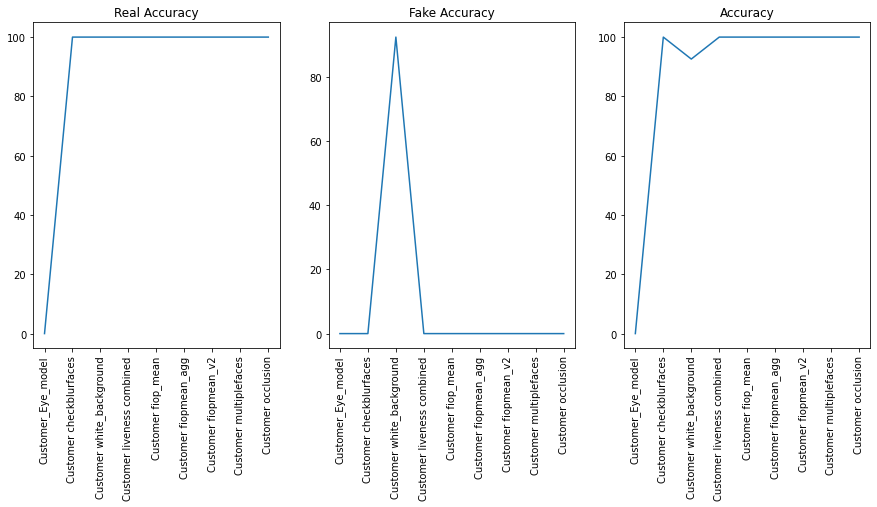

In [81]:
plt.figure(figsize=(15,6))
plt.subplot(1, 3, 1)
plt.plot(results['model'],results['real_acc'])
plt.title("Real Accuracy")
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.plot(results['model'],results['fake_acc'])
plt.title("Fake Accuracy")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.plot(results['model'],results['accuracy'])
plt.title("Accuracy")
plt.xticks(rotation=90)
plt.show()

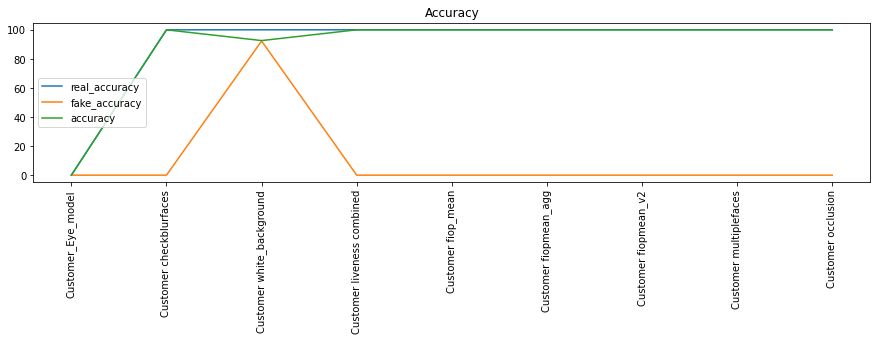

In [82]:
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.plot(results['model'],results['real_acc'])
plt.title("Real Accuracy")
plt.xticks(rotation=90)


plt.subplot(3, 1, 1)
plt.plot(results['model'],results['fake_acc'])
plt.title("Fake Accuracy")
plt.xticks(rotation=90)

plt.subplot(3, 1, 1)
plt.plot(results['model'],results['accuracy'])
plt.title("Accuracy")
plt.xticks(rotation=90)
plt.legend(["real_accuracy",'fake_accuracy','accuracy'],loc='center left')
plt.show()